# Discord Activity Analysis

In [11]:
import glob
import pandas as pd
import matplotlib as plt

list_of_csv_files = glob.glob('./*.csv')
list_of_csv_files.sort()

# read and merge all data exports from discord
df = pd.concat(map(pd.read_csv, list_of_csv_files), ignore_index=True)

df1 = df

# filter dates
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'] >= '2022-07-01']
df = df[df['Date'] <= '2022-07-30']

df

,AuthorID,Author,Date,Content,Attachments,Reactions
7343,861685730937274409,b123#2778,2022-07-01,"For the foreseeable future, we will not be buy...",NaN,NaN
7344,832722913765097535,chadwicktyler#3331,2022-07-01,All of this discussion about Native vs. Back C...,NaN,NaN
7345,861685730937274409,b123#2778,2022-07-01,Let's start with a public Twitter space with d...,NaN,this (1)
7346,817469690347257877,alexcartagenamex#4215,2022-07-01,up for it :praisepepe:,NaN,NaN
7347,832722913765097535,chadwicktyler#3331,2022-07-01,In full support of this. Great idea!,NaN,NaN
...,...,...,...,...,...,...
22844,693277954519728138,Lapsus#4632,2022-07-26,For sure; will review and ship!,NaN,NaN
22845,751493587371556933,claudia#0273,2022-07-26,thank you!,NaN,NaN
22846,693277954519728138,Lapsus#4632,2022-07-26,We need to get clarity on Monolith then. Signi...,NaN,NaN
22847,693277954519728138,Lapsus#4632,2022-07-26,That being said I am not attached to any sunk ...,NaN,NaN


In [12]:

# group by author
df = df[['Author','Content']]
df = df.groupby(['Author'], as_index=False).count()
df = df[df['Content'] >= 15]
df = df.sort_values(by=['Content'], ascending=False)
df.columns = ['Member', 'Discord Interactions']

df
# df

,Member,Discord Interactions
7,Lapsus#4632,362
29,matthewbrooks.eth#1111,268
28,lucaspon#3865,197
16,brileigh.eth#1111,153
31,munzmeister#1952,138
20,claudia#0273,125
30,mdr#8647,100
6,JoseCactuss#2668,68
10,T2#4068,66
21,danielhuete#9519,58


<AxesSubplot:xlabel='Member'>

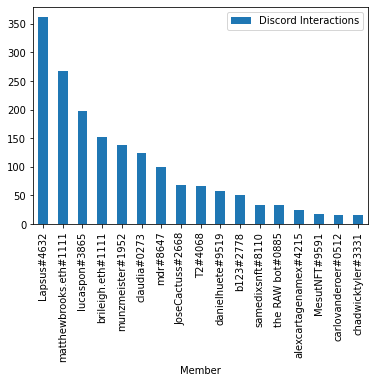

In [13]:
# plot data by member
df.plot(x = 'Member', y = 'Discord Interactions',kind = 'bar')
# df

In [14]:
# data analysis

df1['Month'] = df1['Date'].dt.strftime("%Y-%m")
df1 = df1[['Month','Content']]
df1 = df1.groupby(['Month'], as_index=False).count()
df1.columns = ['Month', 'Discord Interactions']

df1

,Month,Discord Interactions
0,2021-11,1501
1,2021-12,3069
2,2022-01,2139
3,2022-02,210
4,2022-03,2497
5,2022-04,4859
6,2022-05,4662
7,2022-06,1735
8,2022-07,1841


<AxesSubplot:xlabel='Month'>

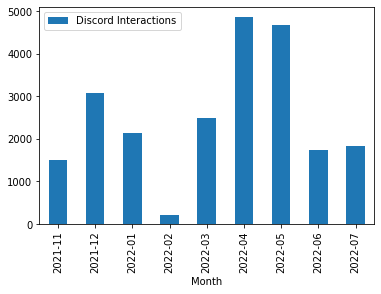

In [15]:
# plot data
df1.plot(x = 'Month', y = 'Discord Interactions',kind = 'bar')